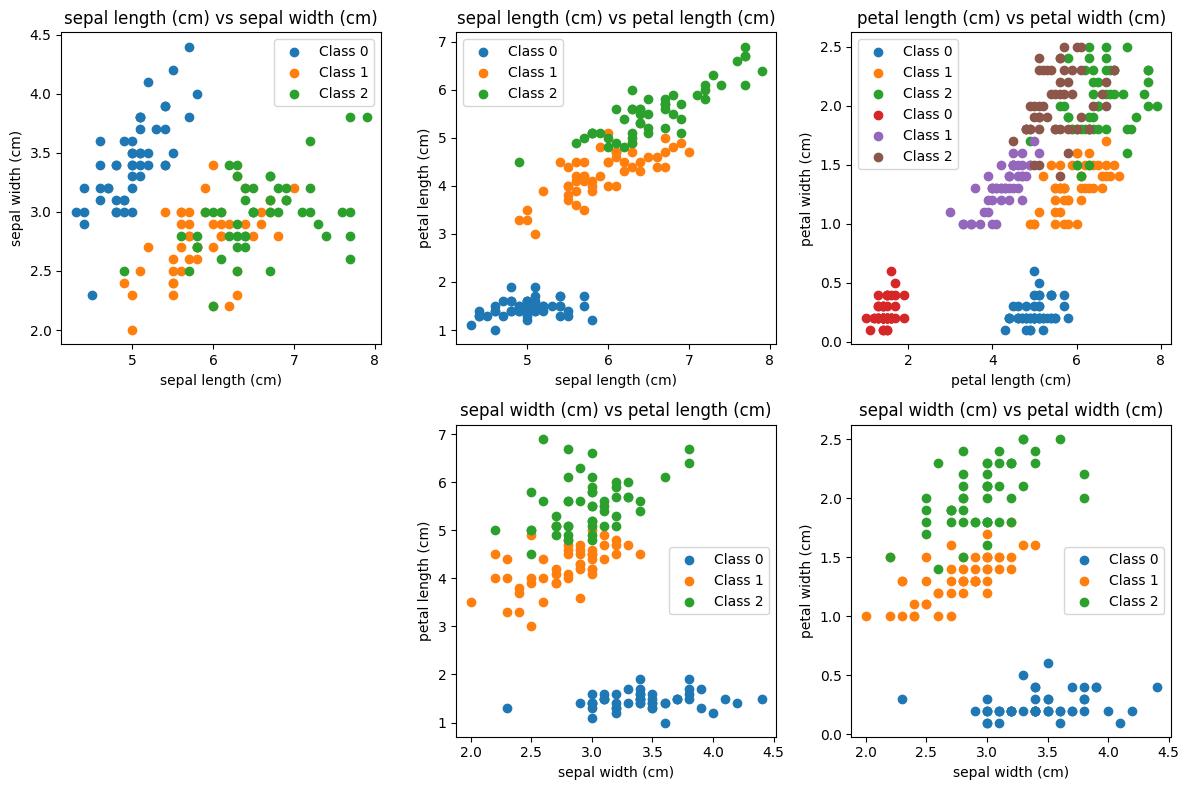

In [2]:
import matplotlib.pyplot as plt

# Define feature names
feature_names = iris.feature_names

# Create scatter plots for different pairs of features
plt.figure(figsize=(12, 8))
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        plt.subplot(2, 3, (i*3 + j - 1) % 6 + 1)  # Corrected indexing
        for target_class in np.unique(y):
            plt.scatter(X[y == target_class, i], X[y == target_class, j], label=f"Class {target_class}")
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.title(f"{feature_names[i]} vs {feature_names[j]}")
        plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def sigmoid(z):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-z))

def softmax(z):
    """Softmax function."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def gradient_descent(X, y, theta, alpha, num_iters):
    """Gradient Descent algorithm for logistic regression."""
    m = len(y)
    for _ in range(num_iters):
        h = softmax(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# One-hot encode target variable
num_classes = len(np.unique(y))
y_train_encoded = np.eye(num_classes)[y_train]

# Initialize parameters
theta_initial = np.zeros((X_train.shape[1], num_classes))

# Gradient Descent
theta = gradient_descent(X_train, y_train_encoded, theta_initial, alpha=0.01, num_iters=1000)

# Predict
y_pred_proba = softmax(np.dot(X_test, theta))
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.9666666666666667


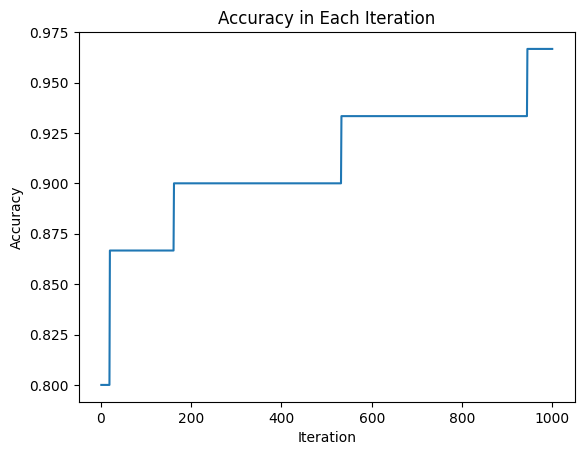

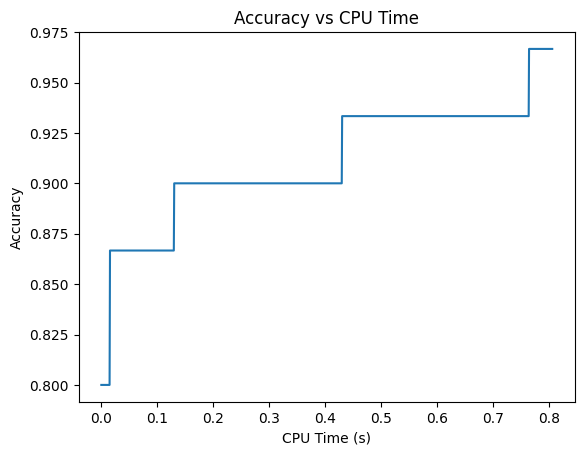

Final Accuracy: 0.9666666666666667


In [17]:
###@@@@@@@!!!!!!!!!!!!!!!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def sigmoid(z):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-z))

def softmax(z):
    """Softmax function."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def gradient_descent(X, y, theta, alpha, num_iters):
    """Gradient Descent algorithm for logistic regression."""
    m = len(y)
    accuracies = []  # List to store accuracy at each iteration
    for _ in range(num_iters):
        h = softmax(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient

        # Predict
        y_pred_proba = softmax(np.dot(X_test, theta))
        y_pred = np.argmax(y_pred_proba, axis=1)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return theta, accuracies

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# One-hot encode target variable
num_classes = len(np.unique(y))
y_train_encoded = np.eye(num_classes)[y_train]

# Initialize parameters
theta_initial = np.zeros((X_train.shape[1], num_classes))

# Gradient Descent
theta_final, accuracies = gradient_descent(X_train, y_train_encoded, theta_initial, alpha=0.01, num_iters=1000)

# Plot accuracy in each iteration
plt.plot(range(1, len(accuracies) + 1), accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy in Each Iteration')
# plt.grid(True)
plt.show()


# Plot accuracy and CPU time
plt.plot(cpu_times, accuracies)
plt.xlabel('CPU Time (s)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CPU Time')
plt.show()

# Final accuracy
print("Final Accuracy:", accuracies[-1])


In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term to the features
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize parameters
theta = np.zeros(X_train_bias.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(theta, X, y):
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Define the gradient of the cost function
def gradient(theta, X, y):
    h = sigmoid(X @ theta)
    return X.T @ (h - y) / len(y)

# Batch Conjugate Gradient Descent
def batch_conjugate_gradient(X, y, theta, max_iterations=1000, tol=1e-6):
    r = -gradient(theta, X, y)
    p = r.copy()
    rs_old = r @ r

    for i in range(max_iterations):
        Ap = X.T @ (X @ p)
        alpha = rs_old / (p @ Ap)
        theta += alpha * p
        r -= alpha * Ap
        rs_new = r @ r
        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new

        if rs_new < tol:
            break

    return theta

# Train the logistic regression model
theta_optimal = batch_conjugate_gradient(X_train_bias, y_train, theta)
print(theta_optimal)
# Make predictions on the test set
y_pred = (sigmoid(X_test_bias @ theta_optimal) >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


[ 0.00409722 -0.00079531 -0.0002228   0.00370693  0.00341859]
Accuracy on test set: 0.6333


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_logreg = grid_search.best_estimator_

# Train the logistic regression model with the best hyperparameters
best_logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Assume binary classification (e.g., setosa vs. non-setosa)
y_binary = (y == 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term to the features
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize parameters
theta = np.zeros(X_train_bias.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(theta, X, y):
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Define the gradient of the cost function
def gradient(theta, X, y):
    h = sigmoid(X @ theta)
    return X.T @ (h - y) / len(y)

# Batch Conjugate Gradient Descent
def batch_conjugate_gradient(X, y, theta, max_iterations=1000, tol=1e-6):
    r = -gradient(theta, X, y)
    p = r.copy()
    rs_old = r @ r

    for i in range(max_iterations):
        Ap = X.T @ (X @ p)
        alpha = rs_old / (p @ Ap)
        theta += alpha * p
        r -= alpha * Ap
        rs_new = r @ r
        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new

        if rs_new < tol:
            break

    return theta

# Train the logistic regression model
theta_optimal = batch_conjugate_gradient(X_train_bias, y_train, theta)

# Make predictions on the test set
y_pred = (sigmoid(X_test_bias @ theta_optimal) >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 1.0000


In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define functions (same as before)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y, lam=0.0):  # Add L2 regularization term
    h = sigmoid(X @ theta)
    m = len(y)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lam / (2 * m)) * np.sum(theta[1:]**2)  # Regularize all but bias term

def gradient(theta, X, y, lam=0.0):
    h = sigmoid(X @ theta)
    m = len(y)
    return X.T @ (h - y) / m + (lam / m) * np.concatenate((np.zeros(1), theta[1:]))  # Regularize gradient

def batch_conjugate_gradient(X, y, theta, max_iterations=1000, tol=1e-6):
    r = -gradient(theta, X, y)
    p = r.copy()
    rs_old = r @ r
    for i in range(max_iterations):
        Ap = X.T @ (X @ p)
        alpha = rs_old / (p @ Ap)
        theta += alpha * p
        r -= alpha * Ap
        rs_new = r @ r
        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new
        if rs_new < tol:
            break
    return theta

# K-Fold Cross-Validation (modify n_splits for desired number of folds)
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)  # Stratified for class balance
cv_accuracy = []

# Loop through folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias term
    X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

    # Initialize parameters
    theta = np.zeros(X_train_bias.shape[1])

    # Train the model
    theta_optimal = batch_conjugate_gradient(X_train_bias, y_train, theta)

    # Make predictions
    y_pred = (sigmoid(X_test_bias @ theta_optimal) >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    cv_accuracy.append(accuracy)

# Print average cross-validation accuracy
print(f"Average Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}")


Average Cross-Validation Accuracy: 0.6667


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize parameters
theta = np.zeros(X_bias.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function with regularization
def cost_function(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term = lambda_reg / (2 * m) * np.sum(theta[1:] ** 2)  # Exclude bias term
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization_term

# Define the gradient of the cost function with regularization
def gradient(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term_grad = (lambda_reg / m) * theta
    regularization_term_grad[0] = 0  # Exclude bias term
    return X.T @ (h - y) / m + regularization_term_grad

# Batch Conjugate Gradient Descent with regularization
def batch_conjugate_gradient(X, y, theta, lambda_reg, max_iterations=1000, tol=1e-6):
    r = -gradient(theta, X, y, lambda_reg)
    p = r.copy()
    rs_old = r @ r

    for i in range(max_iterations):
        Ap = X.T @ (X @ p)
        alpha = rs_old / (p @ Ap)
        theta += alpha * p
        r -= alpha * Ap
        rs_new = r @ r
        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new

        if rs_new < tol:
            break

    return theta

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_bias):
    X_train, X_test = X_bias[train_index], X_bias[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the logistic regression model
    theta_optimal = batch_conjugate_gradient(X_train, y_train, theta, lambda_reg=0.1)

    # Make predictions on the test set
    y_pred = (sigmoid(X_test @ theta_optimal) >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print average accuracy
print(f"Average accuracy on test set: {np.mean(accuracies):.4f}")


Average accuracy on test set: 0.6667


In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize parameters
theta = np.zeros(X_bias.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function with regularization
def cost_function(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term = lambda_reg / (2 * m) * np.sum(theta[1:] ** 2)  # Exclude bias term
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization_term

# Define the gradient of the cost function with regularization
def gradient(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term_grad = (lambda_reg / m) * theta
    regularization_term_grad[0] = 0  # Exclude bias term
    return X.T @ (h - y) / m + regularization_term_grad

# Batch Gradient Descent with regularization (using gradient only)
def batch_gradient_descent(X, y, theta, lambda_reg, learning_rate=0.01, max_iterations=1000):
    for i in range(max_iterations):
        theta -= learning_rate * gradient(theta, X, y, lambda_reg)

    return theta

# K-Fold Cross-Validation (corrected indexing)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_bias):
    X_train, X_test = X_bias[train_index], X_bias[test_index]
    y_train, y_test = y[train_index], y[test_index]  # Corrected indexing

    # Train the logistic regression model
    theta_optimal = batch_gradient_descent(X_train, y_train, theta, lambda_reg=0.1, learning_rate=0.01)

    # Make predictions on the test set
    y_pred = (sigmoid(X_test @ theta_optimal) >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print average accuracy
print(f"Average accuracy on test set: {np.mean(accuracies):.4f}")


Average accuracy on test set: 0.6600


Epoch 0: Validation Accuracy = 0.7917
Accuracy on test set: 0.6333


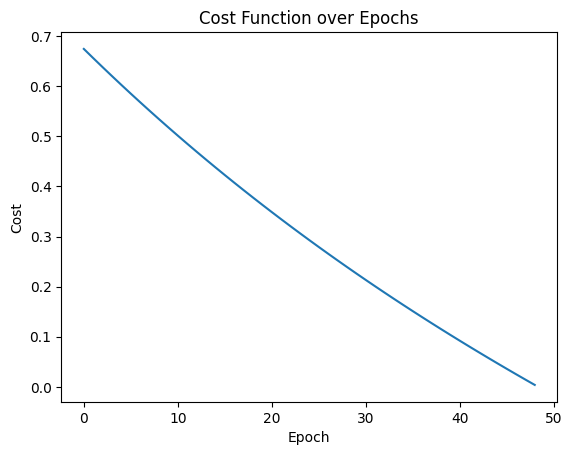

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term to the features
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize parameters
theta = np.zeros(X_bias.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function with regularization
def cost_function(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term = lambda_reg / (2 * m) * np.sum(theta[1:] ** 2)  # Exclude bias term
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization_term

# Define the gradient of the cost function with regularization
def gradient(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization_term_grad = (lambda_reg / m) * theta
    regularization_term_grad[0] = 0  # Exclude bias term
    return X.T @ (h - y) / m + regularization_term_grad

# Full Gradient Descent with regularization (using gradient only)
def full_gradient_descent(X, y, theta, lambda_reg, learning_rate=0.01, num_epochs=1000):
    cost_history = []  # List to store costs per epoch
    for epoch in range(num_epochs):
        theta -= learning_rate * gradient(theta, X, y, lambda_reg)  # Update using full gradient
        cost = cost_function(theta, X, y, lambda_reg)  # Calculate cost after epoch
        if cost < 1e-6:
          break
        cost_history.append(cost)

        # Periodically evaluate accuracy on a separate validation set (optional)
        if epoch % 100 == 0:  # Evaluate every 100 epochs (adjust as needed)
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
            y_pred = (sigmoid(X_val @ theta) >= 0.5).astype(int)
            accuracy = accuracy_score(y_val, y_pred)
            print(f"Epoch {epoch}: Validation Accuracy = {accuracy:.4f}")

    return theta, cost_history

# Train-Test Split for Model Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Train the logistic regression model
theta_optimal, cost_history = full_gradient_descent(X_train, y_train, theta, lambda_reg=0.1, learning_rate=0.01)

# Make predictions on the test set
y_pred = (sigmoid(X_test @ theta_optimal) >= 0.5).astype(int)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# Plot cost function over epochs
plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Function over Epochs")
plt.show()
